# Dimensionality reduction 

https://medium.com/@mayureshrpalav/principal-component-analysis-feature-extraction-technique-3f480d7b9697

In [1]:
# Import statements
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [3]:
file_path = '/Users/dionnespaltman/Desktop/V4/complete_dataset.csv'
complete_dataset = pd.read_csv(file_path, sep=',')
if 'Unnamed: 0' in complete_dataset.columns:
    complete_dataset.drop(columns=['Unnamed: 0'], inplace=True)
display(complete_dataset)

,ID,Sum_12,Sum_4567,VVR_1,VVR_2,Sum_456,VVR_group,Condition,Date,Gender,...,AU09_r__sum_values,AU09_r__variance,AU09_r__standard_deviation,AU09_r__maximum,AU09_r__minimum,AU09_r__median,AU09_r__mean,AU09_r__mean_abs_change,"AU09_r__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""max""","AU09_r__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""min"""
0,23,24.0,37.0,13.0,11.0,27.0,0,2,2020-08-01,2,...,1772.86,0.109496,0.330902,4.98,0.00,0.00,0.120554,0.019213,-0.000032,-0.000022
1,24,23.0,37.0,12.0,11.0,28.0,0,2,2020-01-22,2,...,3197.59,0.063365,0.251725,2.59,0.00,0.00,0.117537,0.024182,-0.000029,-0.000019
2,25,28.0,44.0,16.0,12.0,33.0,1,2,2020-05-02,2,...,2275.65,0.153114,0.391297,4.10,0.00,0.00,0.138912,0.024858,0.000048,0.000033
3,26,30.0,37.0,15.0,15.0,29.0,0,1,2020-06-02,1,...,1755.79,0.052783,0.229745,3.25,0.00,0.00,0.099096,0.016996,-0.000013,-0.000012
4,27,22.0,39.0,11.0,11.0,31.0,0,2,2020-06-02,1,...,20877.08,0.779602,0.882951,3.45,-4.43,1.05,0.992115,0.150508,0.000089,0.000095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,140,16.0,32.0,8.0,8.0,24.0,0,3,2021-05-26,2,...,2324.06,0.044894,0.211882,3.71,0.00,0.00,0.089742,0.014612,-0.000008,-0.000007
100,142,20.0,34.0,11.0,9.0,26.0,0,3,2021-05-31,1,...,3068.82,0.144935,0.380703,4.70,0.00,0.00,0.133172,0.022507,0.000057,0.000042
101,144,24.0,35.0,12.0,12.0,27.0,0,3,2021-01-06,1,...,2307.91,0.123643,0.351629,5.00,0.00,0.00,0.123398,0.018496,-0.000025,-0.000019
102,145,20.0,37.0,11.0,9.0,28.0,0,1,2021-02-06,2,...,3768.23,0.065670,0.256262,3.08,0.00,0.00,0.120352,0.016477,0.000025,0.000020


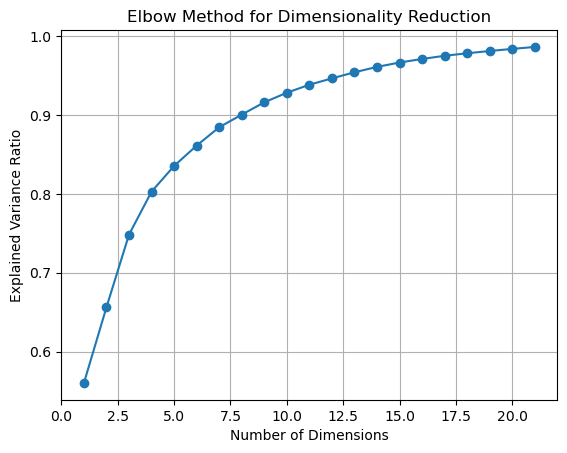

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

columns_to_drop = ['ID', 'Sum_12', 'Sum_4567', 'VVR_1', 'VVR_2', 'Sum_456', 'VVR_group', 'Condition', 'Date', 'Gender']
X = complete_dataset.drop(columns=columns_to_drop)

# Compute PCA for a range of dimensions
max_dimensions = 21
explained_variance_ratios = []

for n_components in range(1, max_dimensions + 1):
    pca = PCA(n_components=n_components)
    pca.fit(X)
    explained_variance_ratios.append(np.sum(pca.explained_variance_ratio_))

# Plot the explained variance ratio against the number of dimensions
plt.plot(range(1, max_dimensions + 1), explained_variance_ratios, marker='o')
plt.xlabel('Number of Dimensions')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Method for Dimensionality Reduction')
plt.grid(True)
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data

array([[ 6.73839149e-02,  1.02742371e+00,  8.08124602e-01, ...,
        -2.02744986e-01, -4.22623122e-02, -7.64622864e-02],
       [ 1.60973937e+00,  8.71803745e-01,  7.23088422e-01, ...,
         4.42737959e-04, -4.21985409e-02, -7.63664260e-02],
       [-6.84510064e-01,  5.07879140e-02,  2.30081514e-01, ...,
         2.80802375e-02, -4.03858762e-02, -7.47918967e-02],
       ...,
       [-1.24477180e+00, -1.82786630e+00, -1.69331685e+00, ...,
        -2.32023394e-01, -4.20993658e-02, -7.63839461e-02],
       [ 4.84739309e-01,  6.87464093e-01,  6.19307492e-01, ...,
        -3.14587586e-01, -4.09248643e-02, -7.51822405e-02],
       [ 1.97544187e+00,  1.04257311e+00,  8.16284350e-01, ...,
        -3.54660858e-01, -4.17215695e-02, -7.59885525e-02]])

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
result = pca.transform(scaled_data)
result

array([[-2.24787414e+00, -3.63172439e-01],
       [-5.40182492e+00, -2.13772166e+00],
       [-1.82417507e+00, -3.89418680e-01],
       [ 1.26907903e+00, -1.05947037e+00],
       [-1.57451178e+01,  2.06096435e+01],
       [-1.55301122e+01,  1.52955868e+01],
       [-3.99165658e-01, -1.49892846e+00],
       [-2.31159972e+00, -7.85692401e-01],
       [-3.41729036e+00, -5.38495137e-01],
       [-2.13825629e+00, -2.19894098e+00],
       [-3.94965846e+00, -3.21082881e+00],
       [-1.85384286e+00, -1.35773693e+00],
       [ 4.40884576e-01,  9.00990990e-01],
       [ 1.67131568e+00,  2.79365941e+00],
       [-2.22593139e-01,  2.10051123e+00],
       [-4.62167671e+00, -2.68386259e-01],
       [-3.55739148e+00, -9.32444783e-01],
       [-2.00286748e+00, -2.98773870e-01],
       [-5.44967777e-01, -7.80035309e-01],
       [-1.63330054e+00, -2.54417351e+00],
       [-2.90210790e+00, -9.65042610e-01],
       [-4.57725150e+00, -7.87480328e-01],
       [-3.30893701e+00, -1.52174591e+00],
       [-3.

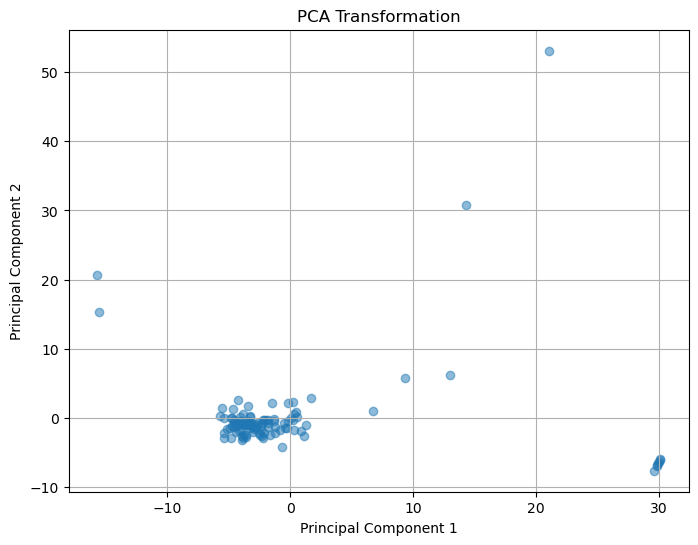

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming scaled_data contains your scaled data

# Perform PCA transformation
pca = PCA(n_components=2)
pca.fit(scaled_data)
result = pca.transform(scaled_data)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(result[:, 0], result[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Transformation')
plt.grid(True)
plt.show()
